# EDA: Breast Cancer Winsconsin

This classic dataset, sourced from the UCI Machine Learning Repository, provides a digitized set of features from breast mass biopsies.

The features are computed from a digitized image of a **fine needle aspirate (FNA)** of a breast mass. They describe characteristics of the cell nuclei present in the image, such as their size, shape, and texture. For each image, ten real-valued features are computed, and for each of these features, the mean value, standard error, and "worst" (mean of the three largest values) are recorded. This results in a total of 30 features.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [31]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    file_path,
)

print("Dataset loaded successfully from Kaggle!")
df.head()

/tmp/ipykernel_17948/147121247.py:6: DeprecationWarning:

Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.



Dataset loaded successfully from Kaggle!


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
print(f"Dataset shape: {df.shape}\n")

print("Dataset Info:")
df.info()

Dataset shape: (569, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

By observing the dataset info we get the following info:
- The dataset contains 569 entries and 33 columns.
- The id column is just an identifier and Unnamed: 32 is completely empty (NaN) so we'll drop it.
- The diagnosis column is of type object and will need to be converted to a numerical format.
- There are no missing values in the feature columns, which simplifies our preprocessing.



In [33]:
df = df.drop(columns=['id', 'Unnamed: 32'])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("Columns after dropping 'id' and 'Unnamed: 32':\n", df.columns)
print("\nDiagnosis value counts after encoding:\n", df['diagnosis'].value_counts())
df.head()

Columns after dropping 'id' and 'Unnamed: 32':
 Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Diagnosis value counts after encoding:
 diagnosis
0    357
1    212
Name: count, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


/tmp/ipykernel_17948/3925343244.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




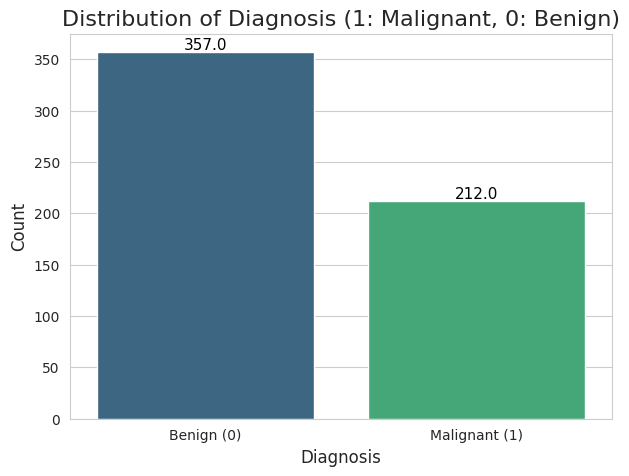

In [35]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='diagnosis', data=df, palette='viridis')

plt.title('Distribution of Diagnosis (1: Malignant, 0: Benign)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

- The dataset contains 357 benign cases and 212 malignant cases.

- The classes are somewhat imbalanced but not severely so. 

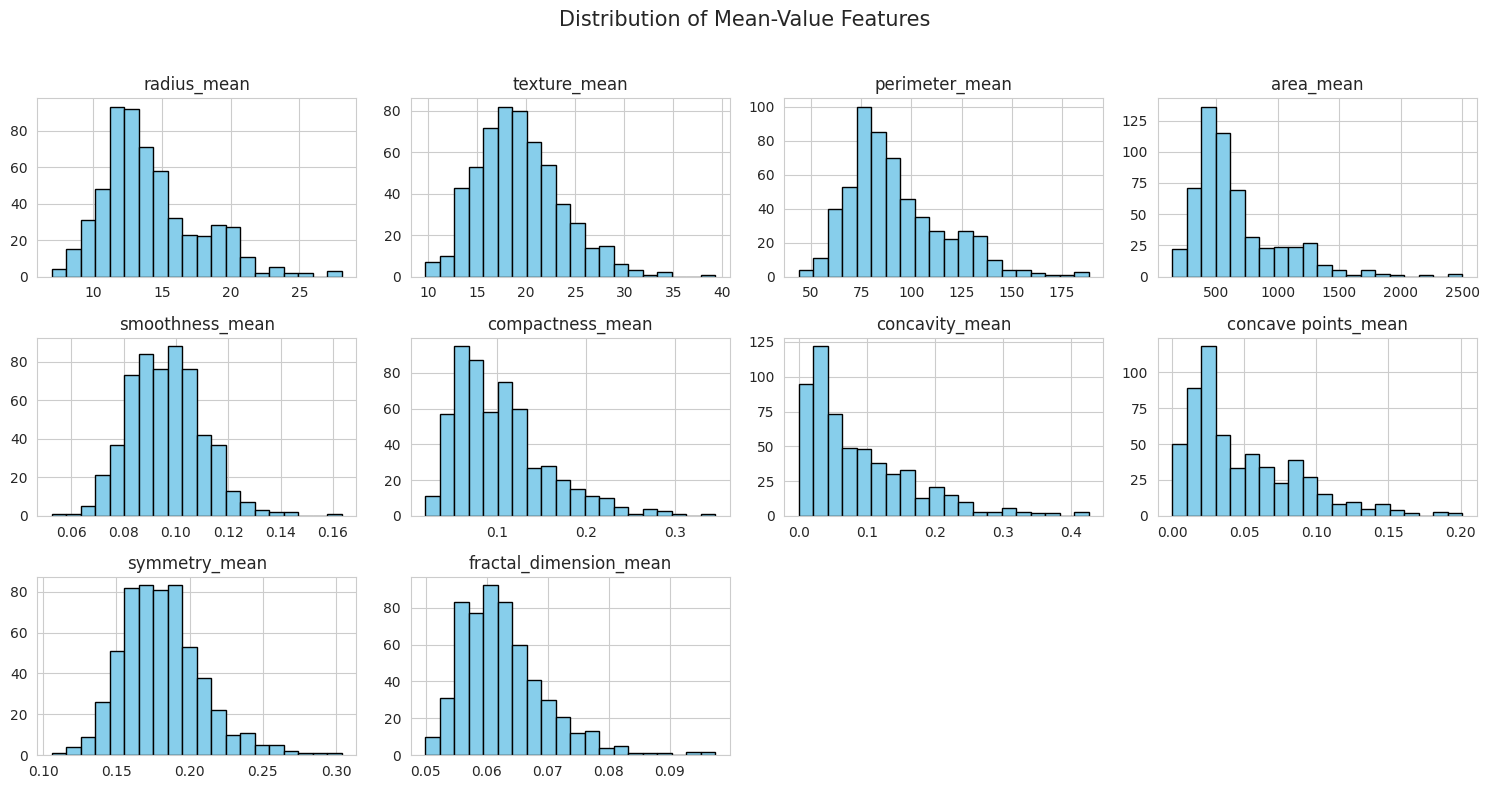

In [36]:
mean_features = df.columns[1:11] 

df[mean_features].hist(bins=20, figsize=(15, 8), layout=(3, 4), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Mean-Value Features', size=15)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

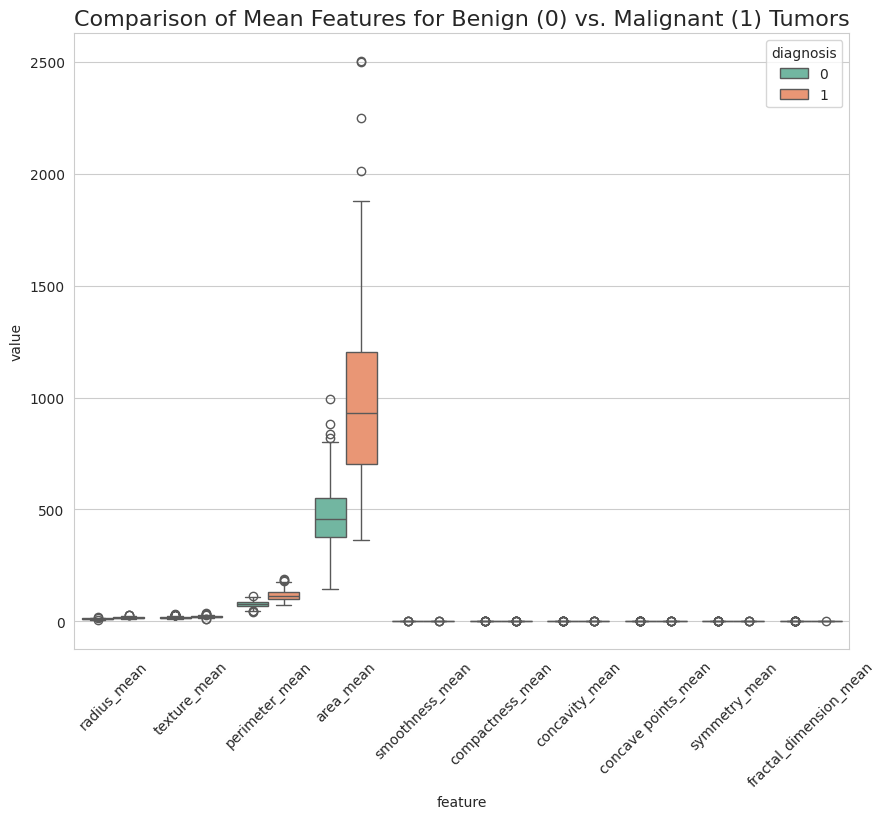

In [37]:

df_melted = pd.melt(df, id_vars="diagnosis", value_vars=mean_features, var_name="feature", value_name="value")

plt.figure(figsize=(10, 8))
sns.boxplot(x="feature", y="value", hue="diagnosis", data=df_melted, palette="Set2")
plt.xticks(rotation=45)
plt.title('Comparison of Mean Features for Benign (0) vs. Malignant (1) Tumors', fontsize=16)
plt.show()

- Features like radius_mean, perimeter_mean, and area_mean are clearly valuable for building a predictive machine learning model.

- The difference in scales between features highlights why scaling should be perform. Without it, models that are sensitive to feature magnitude (like SVMs or Logistic Regression) will be biased by features with large values, like area_mean.



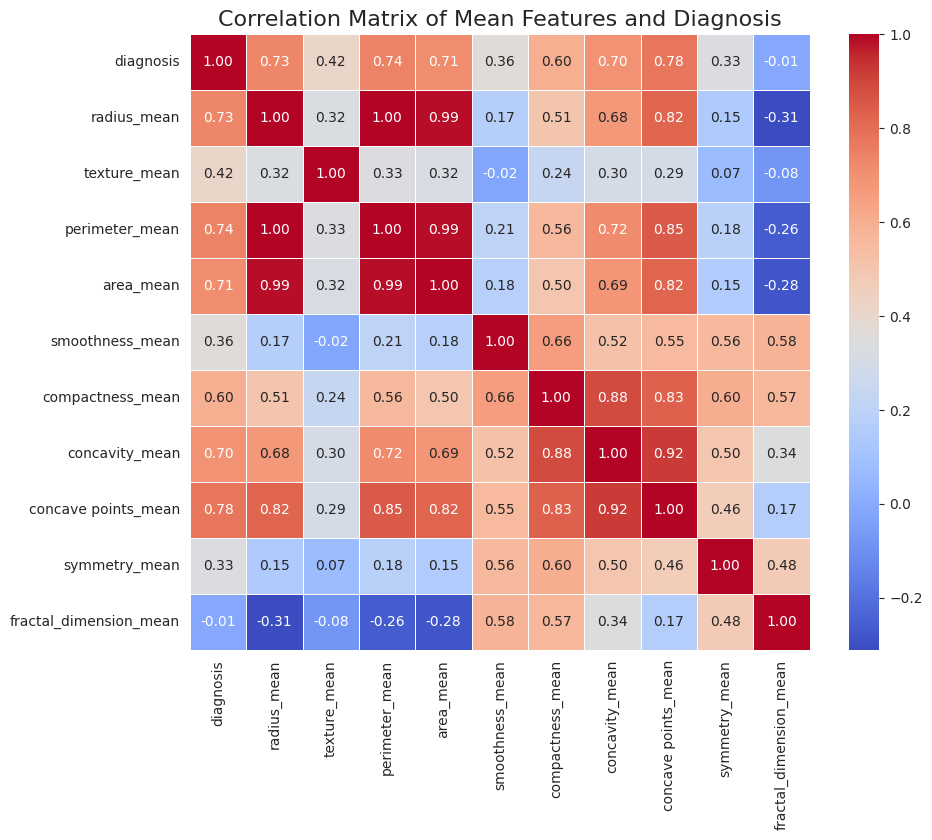

In [38]:
# First 11 columns (diagnosis + 10 mean features)
corr_matrix = df.iloc[:, 0:11].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Mean Features and Diagnosis', fontsize=16)
plt.show()

- **`concave points_mean` (0.82)**, **`radius_mean` (0.73)**, and **`perimeter_mean` (0.74)** show a strong positive correlation with a malignant diagnosis

- (**`radius_mean`**, **`perimeter_mean`**, **`area_mean`**) are almost perfectly correlated. Maybe one of them would be sufficient for modeling. Due to this multicolinearity feature techniques like feature selection or dimensionality reduction (PCA) can be interestant.

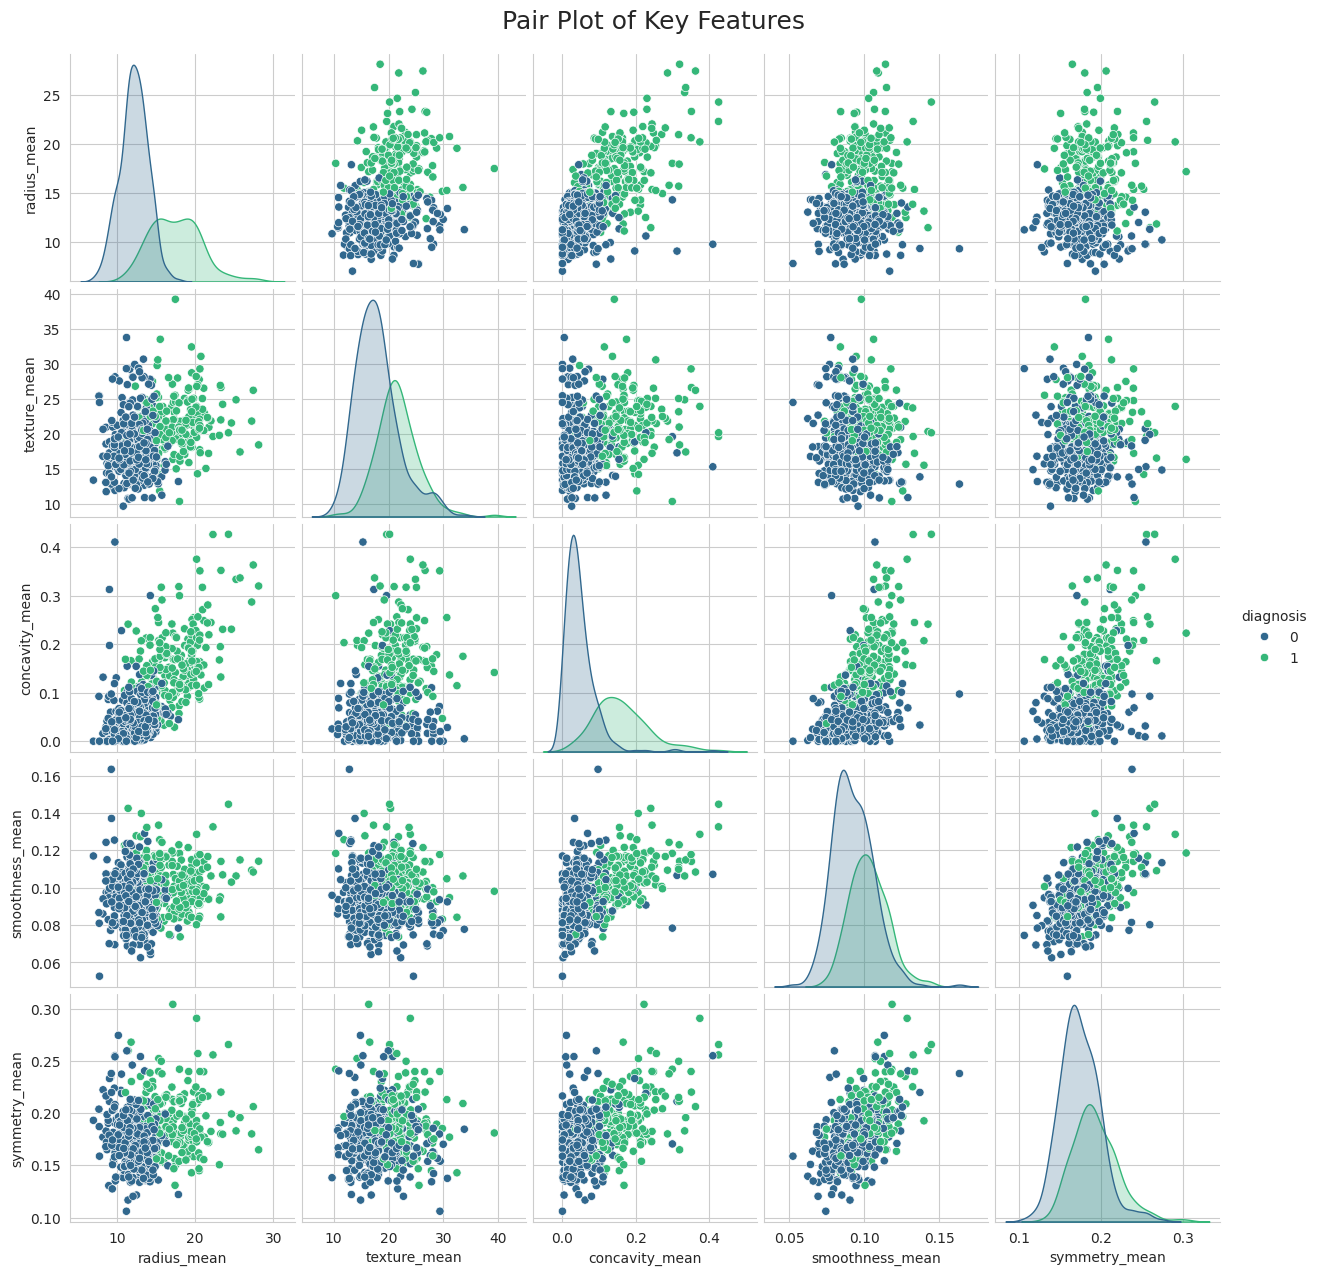

In [39]:
pairplot_features = ['diagnosis', 'radius_mean', 'texture_mean', 'concavity_mean', 'smoothness_mean', 'symmetry_mean']

sns.pairplot(df[pairplot_features], hue='diagnosis', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02, fontsize=18)
plt.show()

 The distributions for benign (blue) and malignant (green) tumorsin the variables **`radius_mean`** and **`concavity_mean`** are clearly separated, whereas features like `texture_mean` show significant overlap.

In [40]:
features_to_plot = df.columns[1:11]
df_plot = df.copy()

scaler = StandardScaler()
df_plot[features_to_plot] = scaler.fit_transform(df_plot[features_to_plot])

df_mean_benign = df_plot[df_plot['diagnosis'] == 0][features_to_plot].mean()
df_mean_malignant = df_plot[df_plot['diagnosis'] == 1][features_to_plot].mean()

fig = go.Figure()

# Benign Trace (Blue)
fig.add_trace(go.Scatterpolar(
    r=df_mean_benign.values,
    theta=features_to_plot,
    fill='toself',
    name='Benign (0)',
    line=dict(color='blue')
))

# Malignant Trace (Red)
fig.add_trace(go.Scatterpolar(
    r=df_mean_malignant.values,
    theta=features_to_plot,
    fill='toself',
    name='Malignant (1)',
    line=dict(color='red')
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-1, 2] 
        )),
    showlegend=True,
    title={'text': "Radar Chart of Mean Feature Values by Diagnosis", 'x':0.5, 'font': {'size': 20}},
    template="plotly_white"
)

fig.show()

In [41]:
features = df.columns.drop('diagnosis')
X = df[features]
y = df['diagnosis']

X_scaled = StandardScaler().fit_transform(X)

# Reduce the 30 features down to 3 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(
    data=principal_components, 
    columns=['PC1', 'PC2', 'PC3']
)

df_pca['diagnosis'] = y

explained_variance = pca.explained_variance_ratio_
print(f"Variance captured by PC1: {explained_variance[0]:.2%}")
print(f"Variance captured by PC2: {explained_variance[1]:.2%}")
print(f"Variance captured by PC3: {explained_variance[2]:.2%}")
print(f"Total variance captured by the first 3 components: {sum(explained_variance):.2%}")

fig = px.scatter_3d(
    df_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='diagnosis',
    color_discrete_map={0: 'dodgerblue', 1: 'red'},
    symbol='diagnosis',
    opacity=0.8,
    hover_name=df_pca.index,
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'}
)

fig.update_layout(
    title={
        'text': "3D PCA of Breast Cancer Dataset",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    legend_title_text='Diagnosis',

)

fig.for_each_trace(lambda t: t.update(name = {'0':'Benign', '1':'Malignant'}[t.name]))

fig.show()

Variance captured by PC1: 44.27%
Variance captured by PC2: 18.97%
Variance captured by PC3: 9.39%
Total variance captured by the first 3 components: 72.64%
